# Lab | Cross Validation

For this lab, we will build a model on customer churn binary classification problem. You will be using `files_for_lab/Customer-Churn.csv` file.



### Instructions

1. Apply SMOTE for upsampling the data

    - Use logistic regression to fit the model and compute the accuracy of the model.
    - Use decision tree classifier to fit the model and compute the accuracy of the model.
    - Compare the accuracies of the two models.


2. Apply TomekLinks for downsampling

    - It is important to remember that it does not make the two classes equal but only removes the points from the majority class that are close to other points in minority class.
    - Use logistic regression to fit the model and compute the accuracy of the model.
    - Use decision tree classifier to fit the model and compute the accuracy of the model.
    - Compare the accuracies of the two models.
    - You can also apply this algorithm one more time and check the how the imbalance in the two classes changed from the last time.

## 1. Import the required libraries and modules that you would need.

### Loading libraries

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
churnData=pd.read_csv("Customer-Churn.csv")
churnData.columns=map(str.lower, churnData.columns)
churnData.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [4]:
churnData.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [5]:
churnData.columns=['gender', 'senior citizen', 'partner', 'dependents', 'tenure',
       'phone service', 'online security', 'online backup', 'device protection',
       'tech support', 'streaming tv', 'streaming movies', 'contract',
       'monthly charges', 'total charges', 'churn']
churnData.head()

,gender,senior citizen,partner,dependents,tenure,phone service,online security,online backup,device protection,tech support,streaming tv,streaming movies,contract,monthly charges,total charges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


### 2. Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [6]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   object 
 1   senior citizen     7043 non-null   int64  
 2   partner            7043 non-null   object 
 3   dependents         7043 non-null   object 
 4   tenure             7043 non-null   int64  
 5   phone service      7043 non-null   object 
 6   online security    7043 non-null   object 
 7   online backup      7043 non-null   object 
 8   device protection  7043 non-null   object 
 9   tech support       7043 non-null   object 
 10  streaming tv       7043 non-null   object 
 11  streaming movies   7043 non-null   object 
 12  contract           7043 non-null   object 
 13  monthly charges    7043 non-null   float64
 14  total charges      7043 non-null   object 
 15  churn              7043 non-null   object 
dtypes: float64(1), int64(2),

In [7]:
churnData["total charges"]=pd.to_numeric(churnData["total charges"],errors='coerce')

In [8]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   object 
 1   senior citizen     7043 non-null   int64  
 2   partner            7043 non-null   object 
 3   dependents         7043 non-null   object 
 4   tenure             7043 non-null   int64  
 5   phone service      7043 non-null   object 
 6   online security    7043 non-null   object 
 7   online backup      7043 non-null   object 
 8   device protection  7043 non-null   object 
 9   tech support       7043 non-null   object 
 10  streaming tv       7043 non-null   object 
 11  streaming movies   7043 non-null   object 
 12  contract           7043 non-null   object 
 13  monthly charges    7043 non-null   float64
 14  total charges      7032 non-null   float64
 15  churn              7043 non-null   object 
dtypes: float64(2), int64(2),

### 3. Check for null values in the dataframe. Replace the null values.

In [9]:
churnData.replace(" ",np.nan)

,gender,senior citizen,partner,dependents,tenure,phone service,online security,online backup,device protection,tech support,streaming tv,streaming movies,contract,monthly charges,total charges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


In [10]:
null_values=pd.DataFrame(churnData.isnull().sum())
null_values.columns=["nber_nulls"]
null_values[null_values["nber_nulls"]>0].head(90)

,nber_nulls
total charges,11


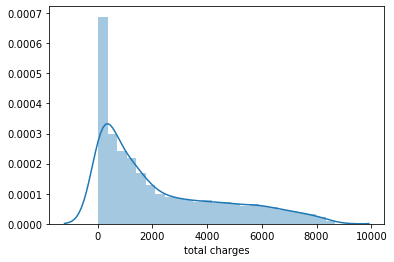

In [11]:
sns.distplot(churnData["total charges"])

In [12]:
churnData["total charges"]=churnData["total charges"].fillna(np.mean(churnData["total charges"]))

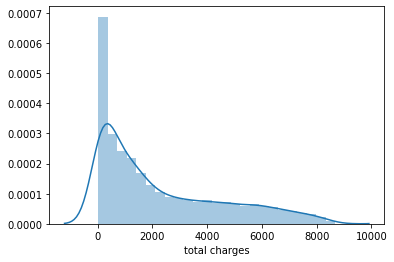

In [13]:
sns.distplot(churnData["total charges"])

### 3. Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
- Scale the features either by using normalizer or a standard scaler.
- Split the data into a training set and a test set.
- Fit a logistic regression model on the training data.
- Check the accuracy on the test data.

In [14]:
churnData.columns

Index(['gender', 'senior citizen', 'partner', 'dependents', 'tenure',
       'phone service', 'online security', 'online backup',
       'device protection', 'tech support', 'streaming tv', 'streaming movies',
       'contract', 'monthly charges', 'total charges', 'churn'],
      dtype='object')

In [15]:
x_num=churnData.select_dtypes(np.number)

In [16]:
x_cat=churnData.select_dtypes(object).drop("churn",axis=1)

In [17]:
y=churnData.churn

#### CATEGORICAL

In [18]:
x_cat=pd.get_dummies(x_cat)
x_cat.head()

,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone service_No,phone service_Yes,online security_No,online security_No internet service,online security_Yes,online backup_No,online backup_No internet service,online backup_Yes,device protection_No,device protection_No internet service,device protection_Yes,tech support_No,tech support_No internet service,tech support_Yes,streaming tv_No,streaming tv_No internet service,streaming tv_Yes,streaming movies_No,streaming movies_No internet service,streaming movies_Yes,contract_Month-to-month,contract_One year,contract_Two year
0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0
2,0,1,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0
4,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


#### NUMERICAL

Distplot:  senior citizen


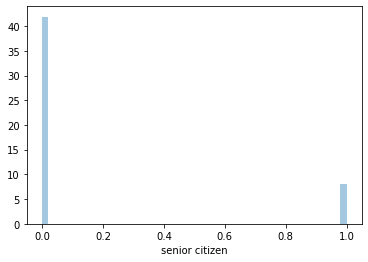

Distplot:  tenure


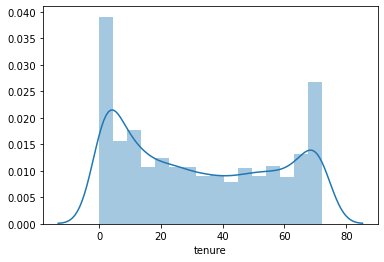

Distplot:  monthly charges


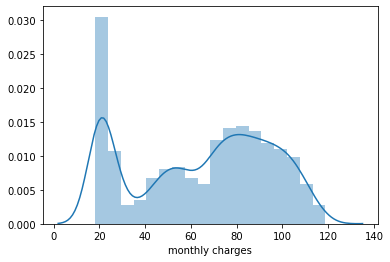

Distplot:  total charges


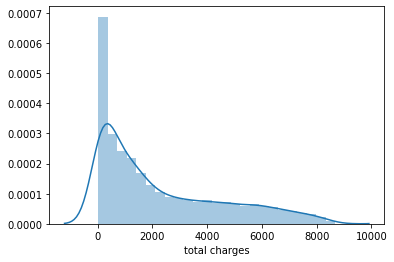

In [19]:
cols = list(x_num)
for col in cols:
    print("Distplot: ",col)
    sns.distplot(x_num[col])
    plt.show()

In [38]:
from sklearn.preprocessing import Normalizer

scaler=Normalizer().fit(x_num)
x_normalised=scaler.transform(x_num)
x_normalised=pd.DataFrame(x_normalised)
x_normalised.columns=x_num.columns
x_normalised.head()

,senior citizen,tenure,monthly charges,total charges
0,0.0,0.023682,0.706908,0.706908
1,0.0,0.017983,0.030122,0.999384
2,0.0,0.016552,0.445662,0.895048
3,0.0,0.024433,0.022967,0.999438
4,0.0,0.011952,0.422512,0.906279


Distplot:  senior citizen


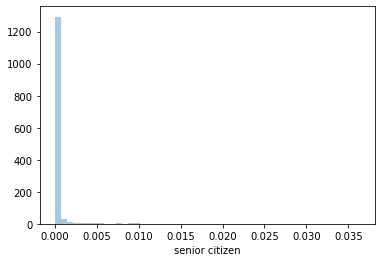

Distplot:  tenure


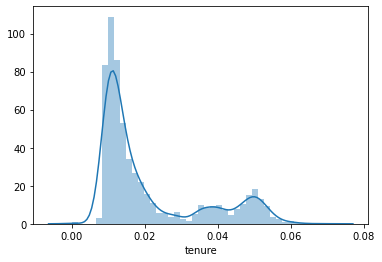

Distplot:  monthly charges


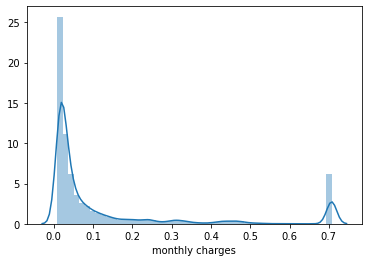

Distplot:  total charges


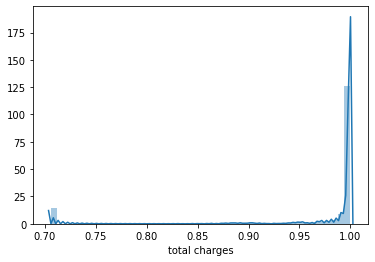

In [39]:
cols = list(x_num)
for col in cols:
    print("Distplot: ",col)
    sns.distplot(x_normalised[col])
    plt.show()

#### DataFrame

In [40]:
X=pd.concat([x_cat,x_normalised],axis=1)
X.head()

,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone service_No,phone service_Yes,online security_No,online security_No internet service,online security_Yes,online backup_No,online backup_No internet service,online backup_Yes,device protection_No,device protection_No internet service,device protection_Yes,tech support_No,tech support_No internet service,tech support_Yes,streaming tv_No,streaming tv_No internet service,streaming tv_Yes,streaming movies_No,streaming movies_No internet service,streaming movies_Yes,contract_Month-to-month,contract_One year,contract_Two year,senior citizen,tenure,monthly charges,total charges
0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0.0,0.023682,0.706908,0.706908
1,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0.0,0.017983,0.030122,0.999384
2,0,1,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0.0,0.016552,0.445662,0.895048
3,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0.0,0.024433,0.022967,0.999438
4,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0.0,0.011952,0.422512,0.906279


### THE MODEL

Model:  DecisionTreeClassifier()
y value counts:
No     5174
Yes    1869
Name: churn, dtype: int64

The accuracy of the model on test set is: 0.73 


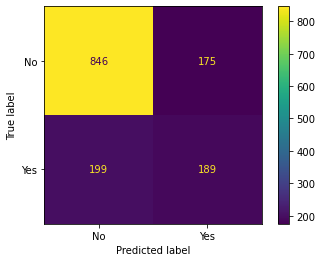

Cohen Kappa score: 0.3218848442422121

Classification Report:
              precision    recall  f1-score   support

         Yes       0.52      0.49      0.50       388
          No       0.81      0.83      0.82      1021

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409


Model:  LogisticRegression(max_iter=500, multi_class='ovr', random_state=0)
y value counts:
No     5174
Yes    1869
Name: churn, dtype: int64

The accuracy of the model on test set is: 0.78 


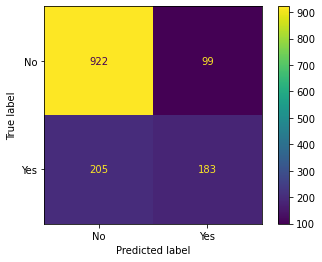

Cohen Kappa score: 0.4093530318616434

Classification Report:
              precision    recall  f1-score   support

         Yes       0.65      0.47      0.55       388
          No       0.82      0.90      0.86      1021

    accuracy                           0.78      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409




In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=250)

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models=[DecisionTreeClassifier(),LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr', max_iter=500)]

for i in models:
    print("Model: ",i)
    classification = i.fit(x_train, y_train)
    from sklearn.metrics import accuracy_score
    predictions = classification.predict(x_test)

    print("y value counts:")
    print(y.value_counts())
    print(
    )

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import plot_confusion_matrix
    print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
    confusion_matrix(y_test, predictions)
    plot_confusion_matrix(classification, x_test, y_test)  # doctest: +SKIP
    plt.show()  # doctest: +SKIP

    from sklearn.metrics import cohen_kappa_score
    print('Cohen Kappa score:',cohen_kappa_score(y_test, predictions))
    print(
    )

    from sklearn.metrics import classification_report
    print("Classification Report:")
    print(classification_report(y_test, predictions
                            , labels=['Yes','No']))
    
    print(
    )

### 4. Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.

In [42]:
y.columns=["churn"]
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: churn, dtype: object

## Downsampling

In [43]:
data = pd.concat([X,y],axis=1)

category_0 = data[data['churn'] == "Yes"]
category_1 = data[data['churn'] == "No"]

# We pick a random sample of rows from of observations belonging to "category_0"
# in the same amount of observations belonging to "category_1"
category_1 = category_0.sample(len(category_0))
print(category_0.shape)
print(category_1.shape)

category_1=category_1.replace("Yes","No")

(1869, 34)
(1869, 34)


In [44]:
data_down = pd.concat([category_0, category_1], axis=0)
y_down=data_down["churn"]
X_down=data_down.drop("churn",axis=1)

Model:  DecisionTreeClassifier()
y value counts:
No     5174
Yes    1869
Name: churn, dtype: int64

The accuracy of the model on test set is: 0.09 


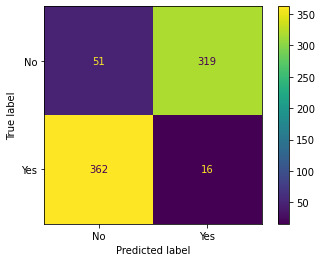

Cohen Kappa score: -0.8188271252285191

Classification Report:
              precision    recall  f1-score   support

         Yes       0.05      0.04      0.04       378
          No       0.12      0.14      0.13       370

    accuracy                           0.09       748
   macro avg       0.09      0.09      0.09       748
weighted avg       0.09      0.09      0.09       748


Model:  LogisticRegression(max_iter=500, multi_class='ovr', random_state=0)
y value counts:
No     5174
Yes    1869
Name: churn, dtype: int64

The accuracy of the model on test set is: 0.45 


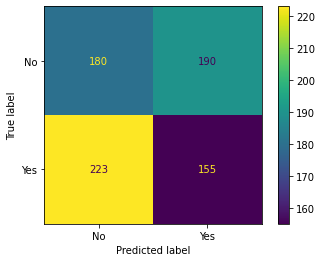

Cohen Kappa score: -0.10336304931710383

Classification Report:
              precision    recall  f1-score   support

         Yes       0.45      0.41      0.43       378
          No       0.45      0.49      0.47       370

    accuracy                           0.45       748
   macro avg       0.45      0.45      0.45       748
weighted avg       0.45      0.45      0.45       748




In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_down, y_down, test_size=0.2, random_state=250)

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models=[DecisionTreeClassifier(),LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr', max_iter=500)]

for i in models:
    print("Model: ",i)
    classification = i.fit(x_train, y_train)
    from sklearn.metrics import accuracy_score
    predictions = classification.predict(x_test)

    print("y value counts:")
    print(y.value_counts())
    print(
    )

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import plot_confusion_matrix
    print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
    confusion_matrix(y_test, predictions)
    plot_confusion_matrix(classification, x_test, y_test)  # doctest: +SKIP
    plt.show()  # doctest: +SKIP

    from sklearn.metrics import cohen_kappa_score
    print('Cohen Kappa score:',cohen_kappa_score(y_test, predictions))
    print(
    )

    from sklearn.metrics import classification_report
    print("Classification Report:")
    print(classification_report(y_test, predictions
                            , labels=['Yes','No']))
    
    print(
    )

# Upsampling

In [46]:
data = pd.concat([X,y],axis=1)

category_0 = data[data['churn'] == "Yes"]
category_1 = data[data['churn'] == "No"]

# We pick a random sample of rows from of observations belonging to "category_0"
# in the same amount of observations belonging to "category_1"
category_1 = category_1.sample(len(category_0))
category_1=category_1.replace("Yes","No")
print(category_0.shape)
print(category_1.shape)

data_up = pd.concat([category_0, category_1], axis=0)
y_up=data_up["churn"]
X_up=data_up.drop("churn",axis=1)


(1869, 34)
(1869, 34)


Model:  DecisionTreeClassifier()
y value counts:
No     5174
Yes    1869
Name: churn, dtype: int64

The accuracy of the model on test set is: 0.67 


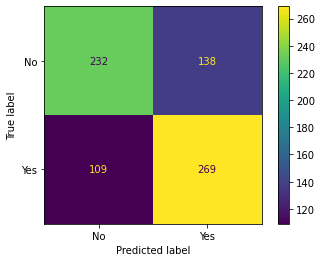

Cohen Kappa score: 0.33894836272040296

Classification Report:
              precision    recall  f1-score   support

         Yes       0.66      0.71      0.69       378
          No       0.68      0.63      0.65       370

    accuracy                           0.67       748
   macro avg       0.67      0.67      0.67       748
weighted avg       0.67      0.67      0.67       748


Model:  LogisticRegression(max_iter=500, multi_class='ovr', random_state=0)
y value counts:
No     5174
Yes    1869
Name: churn, dtype: int64

The accuracy of the model on test set is: 0.76 


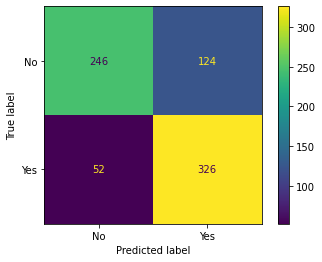

Cohen Kappa score: 0.5283867824492019

Classification Report:
              precision    recall  f1-score   support

         Yes       0.72      0.86      0.79       378
          No       0.83      0.66      0.74       370

    accuracy                           0.76       748
   macro avg       0.77      0.76      0.76       748
weighted avg       0.77      0.76      0.76       748




In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.2, random_state=250)

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models=[DecisionTreeClassifier(),LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr', max_iter=500)]

for i in models:
    print("Model: ",i)
    classification = i.fit(x_train, y_train)
    from sklearn.metrics import accuracy_score
    predictions = classification.predict(x_test)

    print("y value counts:")
    print(y.value_counts())
    print(
    )

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import plot_confusion_matrix
    print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
    confusion_matrix(y_test, predictions)
    plot_confusion_matrix(classification, x_test, y_test)  # doctest: +SKIP
    plt.show()  # doctest: +SKIP

    from sklearn.metrics import cohen_kappa_score
    print('Cohen Kappa score:',cohen_kappa_score(y_test, predictions))
    print(
    )

    from sklearn.metrics import classification_report
    print("Classification Report:")
    print(classification_report(y_test, predictions
                            , labels=['Yes','No']))
    
    print(
    )

## SMOTE

In [48]:
from imblearn.over_sampling import SMOTE

# SMOTE only can handle numerical features. Therefore, if we want to use categoricals they 
# will need to be dummyfied. However, for sake of simplicity we will not include the categoricals.

data = pd.concat([X,y],axis=1)
smote = SMOTE()
y = data['churn']
X = data.drop(['churn'], axis=1)
X_sm, y_sm = smote.fit_sample(X, y)

unique, counts = np.unique(y_sm, return_counts=True)
print(np.asarray((unique, counts)).T)

[['No' 5174]
 ['Yes' 5174]]


Model:  DecisionTreeClassifier()
y value counts:
No     5174
Yes    1869
Name: churn, dtype: int64

The accuracy of the model on test set is: 0.77 


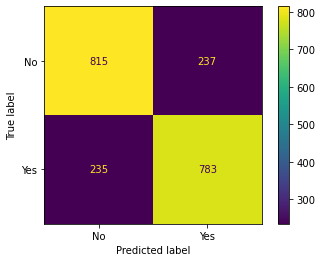

Cohen Kappa score: 0.5438527689851256

Classification Report:
              precision    recall  f1-score   support

         Yes       0.77      0.77      0.77      1018
          No       0.78      0.77      0.78      1052

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070


Model:  LogisticRegression(max_iter=500, multi_class='ovr', random_state=0)
y value counts:
No     5174
Yes    1869
Name: churn, dtype: int64

The accuracy of the model on test set is: 0.81 


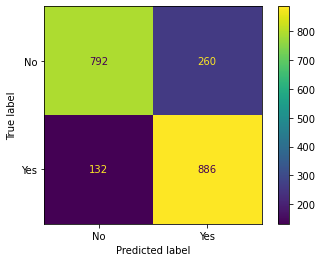

Cohen Kappa score: 0.6219220360968846

Classification Report:
              precision    recall  f1-score   support

         Yes       0.77      0.87      0.82      1018
          No       0.86      0.75      0.80      1052

    accuracy                           0.81      2070
   macro avg       0.82      0.81      0.81      2070
weighted avg       0.82      0.81      0.81      2070




In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=250)

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models=[DecisionTreeClassifier(),LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr', max_iter=500)]

for i in models:
    print("Model: ",i)
    classification = i.fit(x_train, y_train)
    from sklearn.metrics import accuracy_score
    predictions = classification.predict(x_test)

    print("y value counts:")
    print(y.value_counts())
    print(
    )

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import plot_confusion_matrix
    print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
    confusion_matrix(y_test, predictions)
    plot_confusion_matrix(classification, x_test, y_test)  # doctest: +SKIP
    plt.show()  # doctest: +SKIP

    from sklearn.metrics import cohen_kappa_score
    print('Cohen Kappa score:',cohen_kappa_score(y_test, predictions))
    print(
    )

    from sklearn.metrics import classification_report
    print("Classification Report:")
    print(classification_report(y_test, predictions
                            , labels=['Yes','No']))
    
    print(
    )

## Tomek's Links

In [50]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_sample(X, y)

unique, counts = np.unique(y_tl, return_counts=True)
print(np.asarray((unique, counts)).T)

[['No' 4592]
 ['Yes' 1869]]


Model:  DecisionTreeClassifier()
y value counts:
No     5174
Yes    1869
Name: churn, dtype: int64

The accuracy of the model on test set is: 0.75 


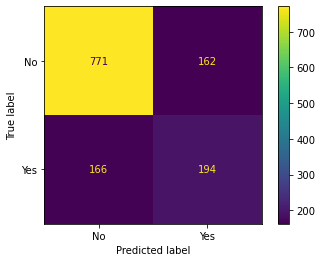

Cohen Kappa score: 0.36650594203158327

Classification Report:
              precision    recall  f1-score   support

         Yes       0.54      0.54      0.54       360
          No       0.82      0.83      0.82       933

    accuracy                           0.75      1293
   macro avg       0.68      0.68      0.68      1293
weighted avg       0.75      0.75      0.75      1293


Model:  LogisticRegression(max_iter=500, multi_class='ovr', random_state=0)
y value counts:
No     5174
Yes    1869
Name: churn, dtype: int64

The accuracy of the model on test set is: 0.80 


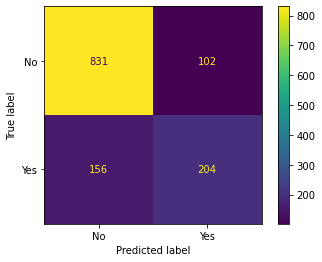

Cohen Kappa score: 0.47942473526024554

Classification Report:
              precision    recall  f1-score   support

         Yes       0.67      0.57      0.61       360
          No       0.84      0.89      0.87       933

    accuracy                           0.80      1293
   macro avg       0.75      0.73      0.74      1293
weighted avg       0.79      0.80      0.80      1293




In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=250)

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models=[DecisionTreeClassifier(),LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr', max_iter=500)]

for i in models:
    print("Model: ",i)
    classification = i.fit(x_train, y_train)
    from sklearn.metrics import accuracy_score
    predictions = classification.predict(x_test)

    print("y value counts:")
    print(y.value_counts())
    print(
    )

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import plot_confusion_matrix
    print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
    confusion_matrix(y_test, predictions)
    plot_confusion_matrix(classification, x_test, y_test)  # doctest: +SKIP
    plt.show()  # doctest: +SKIP

    from sklearn.metrics import cohen_kappa_score
    print('Cohen Kappa score:',cohen_kappa_score(y_test, predictions))
    print(
    )

    from sklearn.metrics import classification_report
    print("Classification Report:")
    print(classification_report(y_test, predictions
                            , labels=['Yes','No']))
    
    print(
    )